In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
from sklearn import metrics
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")

In [59]:
autodf = pd.read_csv("../dataset/auto_cleaned.csv")

In [60]:
autodf.drop(["Unnamed: 0"], axis=1, inplace=True)

In [61]:
autodf.head()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,13495.0
1,3,alfa-romero,gas,std,2,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9,111,5000,21,27,16500.0
2,1,alfa-romero,gas,std,2,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9,154,5000,19,26,16500.0
3,2,audi,gas,std,4,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10,102,5500,24,30,13950.0
4,2,audi,gas,std,4,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8,115,5500,18,22,17450.0


In [62]:

autodf = pd.get_dummies(autodf, drop_first=True, dtype=float)

In [63]:
autodf.head()

,symboling,num-of-doors,wheel-base,length,width,height,curb-weight,engine-size,bore,stroke,...,num-of-cylinders_four,num-of-cylinders_six,num-of-cylinders_three,num-of-cylinders_twelve,fuel-system_2bbl,fuel-system_idi,fuel-system_mfi,fuel-system_mpfi,fuel-system_spdi,fuel-system_spfi
0,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,2,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,1,2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,4,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,2,4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


Spliting our data. Symboling is the target variable because we want to predict what that score will be given all the other values. 

In [64]:
y = autodf["symboling"]
X = autodf.drop("symboling", axis= 1)

In [65]:
from sklearn.model_selection import train_test_split

In [66]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

We want to now fit and scale our data.

In [67]:
from sklearn.preprocessing import StandardScaler

In [68]:
scaler = StandardScaler()
scaler.fit(X_train) 
scaler.transform(X_train)

array([[-1.26892454, -0.72550043, -0.74929085, ..., -0.91287093,
        -0.21821789, -0.08084521],
       [-1.26892454, -0.85096597, -1.38334974, ..., -0.91287093,
        -0.21821789, -0.08084521],
       [ 0.78806893,  0.51347181,  0.06705996, ...,  1.09544512,
        -0.21821789, -0.08084521],
       ...,
       [ 0.78806893,  0.19980795,  0.55052986, ...,  1.09544512,
        -0.21821789, -0.08084521],
       [ 0.78806893,  0.19980795,  0.43164382, ...,  1.09544512,
        -0.21821789, -0.08084521],
       [ 0.78806893,  1.37604741,  0.94681666, ...,  1.09544512,
        -0.21821789, -0.08084521]])

In [69]:
# from sklearn.preprocessing import MinMaxScaler

# scaler = MinMaxScaler()
# scaler.fit(X_train)
# scaler.transform(X_train)

Linear regression modeling:

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
model = LinearRegression()
model.fit(X_train, y_train)
X_test = scaler.transform(X_test)
y_pred = model.predict(X_test)


Linear regression model evaluation: 

In [72]:
y_pred = model.predict(X_test)
model.score(X_test, y_test)


-127.64995633330477

Alternative method regression model evaluation: 

In [73]:
from sklearn.metrics import r2_score

In [74]:
r2_score(y_test, y_pred)

-127.64995633330477

Linear Regression Model Visual Evaluation:

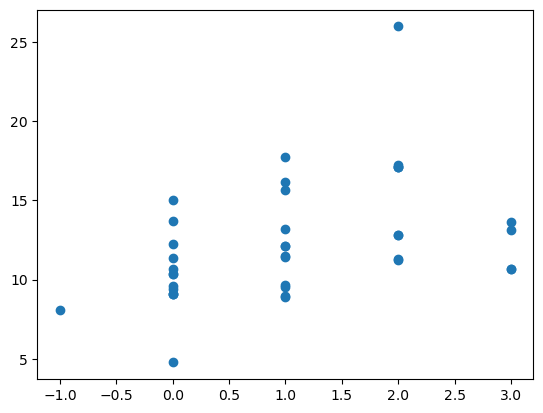

In [76]:
#plotting a line through the test set
plt.scatter(y_test, y_pred)

In [78]:
residual = y_test - y_pred 

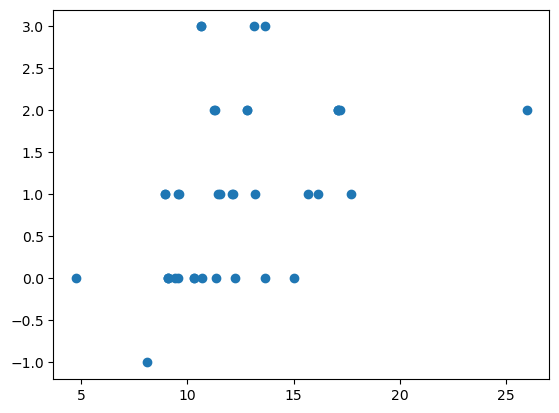

In [79]:
plt.scatter(y_pred, y_test)

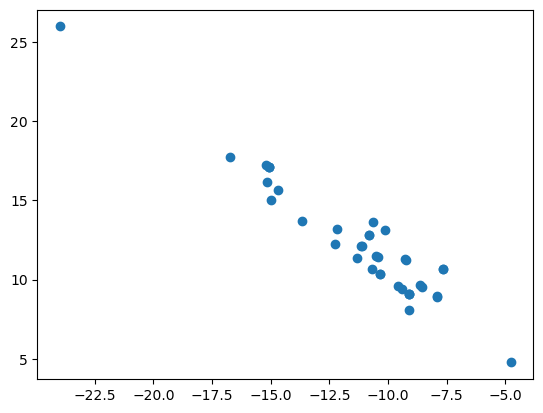

In [80]:
plt.scatter(residual, y_pred)